# Project 2019 Programming for Data Analysis

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.<br>
* Investigate the types of variables involved, their likely distributions, and their relationships with each other<br>
* Synthesise/simulate a data set as closely matching their properties as possible.<br>
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.<br>


# Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

I have selected a dataset that is available on www.data.gov.ie. <br>
This is an initiative by the government of Ireland that makes data held by public bodies available and easily accessible online for reuse and redistribution.<br>
I have chosen the OPW Heritage Site Details open dataset.<br>
The Office of Public Works is a government department with responsibility for the day-to-day running of all National Monuments in State care and National Historic Properties.  The dataset relates to the Heritage Sites that are open to the public.<br>
I chose this dataset because it is of interest to me in my professional life. <br>In this project, I will compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

In [2]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [3]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code
#df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1")
df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/New.csv", encoding="ISO-8859–1")

HTTPError: HTTP Error 404: Not Found

In [ ]:
print("Load CSV file from a url into a dataframe and print")
df

Initially the output contained over 2400 rows, with just 100 containing data so I included nrows=100 to specify.
???(However after this was added, even though it was in a subsequent row, the notebook seemed to "remember" that command and just out put 100 rows every time.




In [ ]:
df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1",nrows=100)


In [ ]:
df

**Comment** 
As stated previously, I intend to compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

There is sufficient information contained "Address" and "Region" columns to provide for such an investigation. I will therefore remove the rows 
* WGS84 Web Mercator (Auxiliary Sphere) Coordinates		
* Latitude	
* Longitude	
* GPS Coordinates (Google Maps)	
And the column "X" and "Y" because it is not clear what this information relates to.

In [ ]:
#Code adapted from https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python
#To delete a column, or multiple columns, use the name of the columns, and specify the “axis” as 1. 
df=df.drop(["X","Y","WGS84 Web Mercator (Auxiliary Sphere) Coordinates","Latitude","Longitude", "GPS Coordinates (Google Maps)"], axis=1)
df

In [ ]:
#Now several excess columns have been deleted, produce a list of the remaining columns.
print("Print Information about the OPW Heritage Site Details Open Dataset")
df.info()

In [ ]:
print("Print Contents of Admission Charges Column")
df['Admission Charges']

**Comment:** The Admission Charges column contains crucial data for this exercise, however it contains excess information than that will provide a challenge to adapt to meaningful financial information.  

In [ ]:
#code adapted from https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
  
# new data frame with split value columns 
new = df["Admission Charges"].str.split("\r\n\r", n = 3, expand = True) 
  
# making separate adult admission column from new data frame 
df["Adult Admission"]= new[0] 
  
# making separate Senior/Group column from new data frame 
df["Senior_Group"]= new[1] 

# making separate Child/Student column from new data frame 
df["Child_Student"]= new[2] 

# making separate Family and any other information column from new data frame 
df["Family"]= new[3] 

In [ ]:
df

In [ ]:
#Unsuccessful attempt to remove string element, replace with blank space and change datatype to float, due to extra inforamtion that is contained in the column
#I fear the only solution to keep the task moving will be to revert to excel software.
#code adapted from https://www.ritchieng.com/pandas-changing-datatype/
df['Child_Student'] = df.Child_Student.str.replace ('Child/Student: EUR', '').astype(float)

In [ ]:
#!
![alt text](https://github.com/ClodaghMurphy/ProgDA_ProjectDec2019/blob/master/Data%20Cleaning.jpeg)


### Summary of Section 1<br>
I have selected a dataset and carried out initial investigations to determine the contents.<br>
I used pandas commands to remove columns of data that are not required and attempted to streamline the key data points which concern the pricing structure. <br>
Due to the limited timeframe involved in this project and the fact that it is not a test of data cleaning skills, I have decided to adjust it separately, re-save this truncated version in the github repository and continue the project with the updated version.

# Investigate the types of variables involved, their likely distributions, and their relationships with each other

In [5]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code   
df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/opw-heritage-site-detailsNEW.csv", encoding="ISO-8859–1")

In [6]:
df

,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
0,Adare Castle,Co. Limerick,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,6.0,5.0,5.0,5.0,5.0,15.0,Shannon,0
1,Altamont Gardens,Co. Carlow,"Free, except for pre-booked guided tours.\r\n\...",0.0,0.0,0.0,0.0,0.0,0.0,South-East,58435
2,Aras an Uachtarain,Dublin 8,Free admission tickets are issued at the Phoen...,NaN,NaN,NaN,NaN,NaN,NaN,Dublin,4343
3,Arbour Hill Cemetery,Dublin 7,Free,0.0,0.0,0.0,0.0,0.0,0.0,Dublin,0
4,Ardfert Cathedral,Co. Kerry,Adult: EUR 5.00\n\nSen/Group: EUR 4.00\n\nChil...,5.0,4.0,4.0,3.0,3.0,13.0,Shannon,7802
5,Athenry Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,10848
6,Aughnanure Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,36929
7,Ballyhack Castle,Co. Wexford,Free,0.0,0.0,0.0,0.0,0.0,NaN,South-East,2613
8,Barryscourt Castle,Co.Cork,Free,0.0,0.0,0.0,0.0,0.0,NaN,South-West,0
9,Battle of the Boyne,Co. Meath,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,Midlands & East Coast,58053


In [ ]:
The numbers are all in 


In [ ]:
#to save keystrokes, when "tips" is typed, the notebook will automatically load the tips data set from seaborn.
#tips = sns.load_dataset("tips")
#Print a description of the output
print("Information about the Tips Dataset")
#code verbatim from https://www.kaggle.com/ssouhassou/data-viz-a-modest-essay-on-the-dataset-tips
df.info()

In [ ]:
#i am going to ch

In [19]:

#Print a description of the output
print("Description of the OPW Dataset")
df.describe()
#if parentheses ()are not used, all columns will display but no useful summary statistics!
#According to pandas 0.25.1 documentation:
#For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. 
#By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

Description of the OPW Dataset


,Adult,Senior,Group,Child,Student,Family,2015 Visitor Numbers
count,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,100.000000
mean,2.959596,2.333333,2.333333,1.717172,1.828283,7.721649,51411.470000
std,3.247980,2.567457,2.575394,1.868320,2.104613,8.393626,95609.074832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12526.500000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,13.000000,53375.250000
max,12.000000,9.000000,9.000000,7.000000,8.000000,32.000000,553348.000000


In [ ]:
COMMENT:


In [ ]:
#Print a description of the output
print("OPW Dataset Head")
df.head()
#The head() command returns 5 as a default when no argument is entered

In [20]:
#Print a description of the output
print("OPW Dataset Region, 2015 Visitor Numbers")
#this syntax is wrong : df['tip','day']
#this syntax [[double square brackets]] is correct
df[['Region', '2015 Visitor Numbers']]
#the df command produces an indexed data series of just two data columns that were passed into the argument.

OPW Dataset Region, 2015 Visitor Numbers


,Region,2015 Visitor Numbers
0,Shannon,0
1,South-East,58435
2,Dublin,4343
3,Dublin,0
4,Shannon,7802
5,West,10848
6,West,36929
7,South-East,2613
8,South-West,0
9,Midlands & East Coast,58053


In [21]:
#Print a description of the output
print("OPW Dataset - Use of .loc and Boolean format as a sorting tool")
#this is a useful tool using Boolean values to select item
#the command outputs only the results== Sun from the set in the previous cell
df.loc[df.loc[:, 'Region'] == 'West']


OPW Dataset - Use of .loc and Boolean format as a sorting tool


,Name,County,Admission Charges,Adult,Senior,Group,Child,Student,Family,Region,2015 Visitor Numbers
5,Athenry Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,10848
6,Aughnanure Castle,Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,36929
10,Boyle Abbey,Co. Roscommon,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,6919
16,Ceide Fields,Co. Mayo,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,32821
19,Connemara National Park,Co. Galway,Free,0.0,0.0,0.0,0.0,0.0,0.0,West,0
20,Coole Park,Co. Galway,Free,0.0,0.0,0.0,0.0,0.0,0.0,West,0
29,Dun Aonghasa,Co. Galway,Adult: EUR 5.00 \nSen/Group: EUR 4.00 \nChild/...,5.0,4.0,4.0,3.0,3.0,13.0,West,120104
72,Portumna Castle and Gardens,Co. Galway,Adult: EUR 5.00 \nSen/Group: EUR 4.00 \nChild/...,5.0,4.0,4.0,3.0,3.0,13.0,West,14237
73,Rathcroghan - Royal Celtic Site,Co Roscommon,Exhibition: \nAdult: EUR 7.00 \nSen...,7.0,6.0,6.0,3.0,6.0,20.0,West,0
89,Teach An Phiarsaigh (Patrick Peasrse's Cottage),Co. Galway,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,5.0,4.0,4.0,3.0,3.0,13.0,West,8946


Data Visualisation - OPW Dataset hexplot of Region V 2015 Visitor Numbers


TypeError: can't multiply sequence by non-int of type 'float'

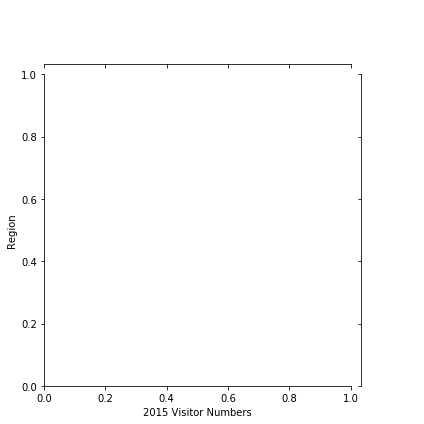

In [23]:

#Print a description of the output
print ("Data Visualisation - OPW Dataset hexplot of Region V 2015 Visitor Numbers")
#code verbatim from https://www.kaggle.com/ranjeetjain3/different-types-of-charts

sns.jointplot(y = 'Region', x = '2015 Visitor Numbers', data = df ,kind = 'hex')

Adult                     AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
Senior                  AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
Group                   AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
Child                   AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
Student                 AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
Family                  AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
2015 Visitor Numbers    AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
dtype: object

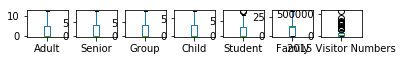

In [9]:
df.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False)

#Command to display the plot

#plt.show()

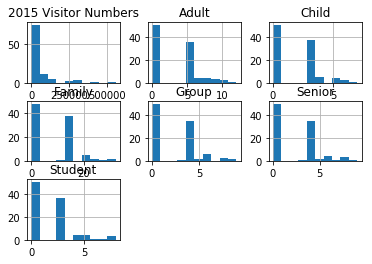

In [10]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#A histogram is an accurate representation of the distribution of numerical data
#This is a type of univariate analysis, i.e. looking at just one subset of the data at a time.
#A histogram relates only one variable

df.hist()
plt.show()


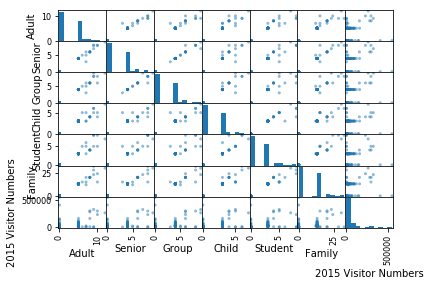

In [11]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')


#A scatterplot uses dots to represent pieces of data
#A scattermatrix displays all the fields on both x and y axis, 
# the variables are represented in both scatterplots and histograms
#This overview shows the correlation between the data and can help identify
#structured relationships between types of data

scatter_matrix(df)
plt.show()

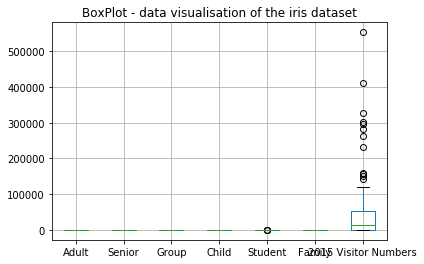

In [12]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#Create a boxplot to view all the columns at once on the same scale which is helpful
#to put the data in context

plt.title ('BoxPlot - data visualisation of the iris dataset')
df.boxplot()
#Command to display the plot
plt.show()

In [13]:
#12042019 Investigate the DataSet
#Experimenting with pandas functions
#Adapted from
# https://stackoverflow.com/questions/33034243/calculating-the-mean-and-std-on-excel-file-using-python
#Import pandas module
import pandas
#
#The standard deviation is amount of variability (or spread) 
#among the numbers in a data set, that is the standard (or typical) 
# amount of deviation (or distance) from the mean
#https://wiki.kidzsearch.com/wiki/Standard_deviation

#dataset = pandas.read_csv('irisdataset.txt')
print(" 'std' calculates and displays the standard deviation in each column")
print(df.std())

 'std' calculates and displays the standard deviation in each column
Adult                       3.247980
Senior                      2.567457
Group                       2.575394
Child                       1.868320
Student                     2.104613
Family                      8.393626
2015 Visitor Numbers    95609.074832
dtype: float64


No handles with labels found to put in legend.


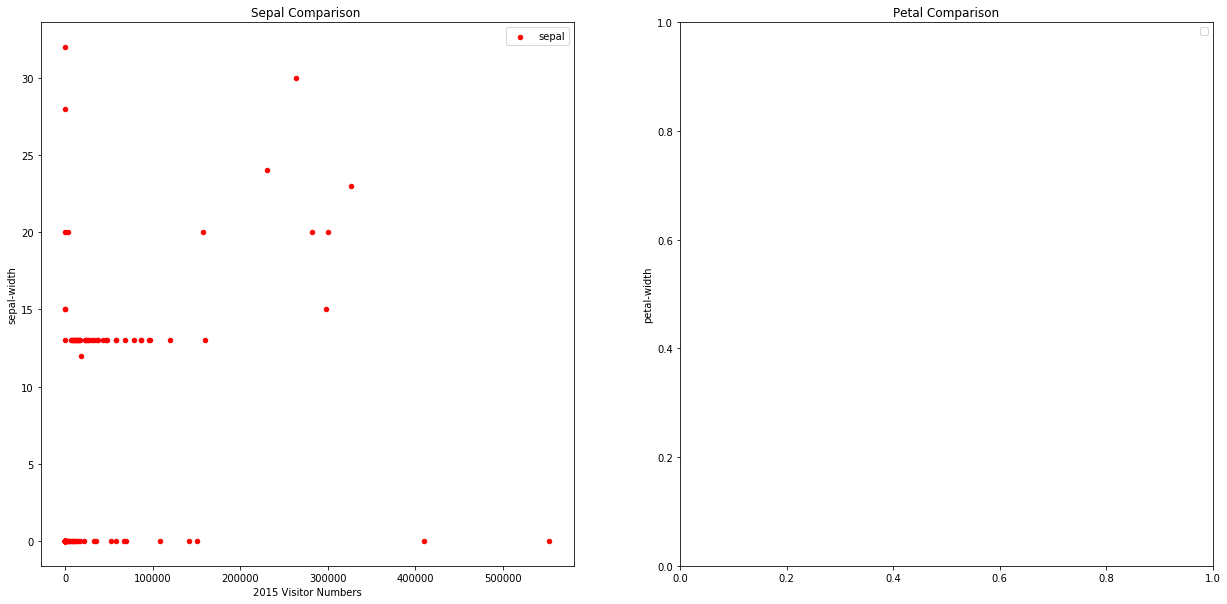

In [18]:
#12042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#adapted from https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

import matplotlib
import matplotlib.pyplot as plt
import pandas

#Plotting Scatterplot Petal Length vs Petal Width & Sepal Length vs Sepal width

#dataset = pandas.read_csv('irisdataset.txt')
#According to https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
#fig, ax = plt.sublots() creates just a figure and only one subplot
#ax can be either a single Axes object or an array of Axes objects if more than one subplot was created. 
fig,ax=plt.subplots(1,2,figsize=(21, 10))
#fig,ax=plt.subplots(1,2,figsize=(17, 9))

df.plot(y="Family",x="2015 Visitor Numbers",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
#df.plot(x="petal length in cm",y="petal width in cm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal Comparison ', ylabel='sepal-width')
ax[1].set(title='Petal Comparison',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

plt.show()
#While this plot does not separate the different species, it's an interesting image to
#view and recognise how some petals measurements are very obviously distinguishable

Data Visualisation - Countplot of Smokers


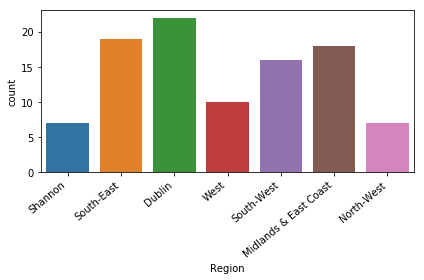

In [30]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Regions")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Region", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



Data Visualisation - Countplot of Smokers


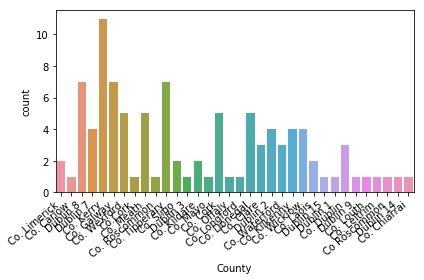

In [31]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Counties")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="County", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#sns.countplot('County', data=df)

Data Visualisation - Countplot of 2015 Visitor Numbers


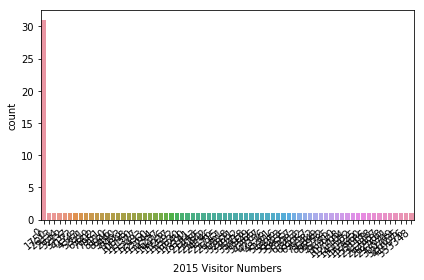

In [35]:


#Print a description of the output
print ("Data Visualisation - Countplot of 2015 Visitor Numbers")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="2015 Visitor Numbers", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Data Visualisation - Countplot of Adult Admission Charges


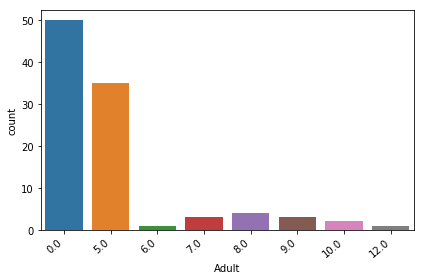

In [36]:
#Print a description of the output
print ("Data Visualisation - Countplot of Adult Admission Charges")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Adult", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


**Summary of Section 2**


The eleven types of variables in the truncated dataset are
* Name of Heritage Site, County,Region - all objects
* Admission Charges is the original column that contains all the variations of charges and is also in object datatype.
* I have divided the Admissions Charges for Adult, Senior, Group, Child, Student and Family into separate columns -float64 datatype
* 2015 Visitor Numbers are datatype int64 (integers).

their likely distributions, 
The Heritage Sites are in 7 different geographical regions

and their relationships with each other